# Find files in one location their likely duplicates in another location based on filename

For each picture in a 'check' folder, look in a reference folder to see if a picture in the reference folder exists with a filename that includes the stem of the check files. Then compares EXIF data.


In [98]:
import pandas as pd
import pathlib
import glob
from pprint import pprint
import re
from PIL import Image
from PIL.ExifTags import TAGS

In [65]:
fpath_refdir = pathlib.Path('/home/robert/Pictures/2014')
fpath_checkdir = pathlib.Path('/media/robert/seago/pictures-full/2014')
fpattern = '*.[jJ][pP][gG]'
re_canonical = re.compile(r'\s*([^ .]+)\.?')

In [70]:
def load_folder(fpath_dir, fpattern=fpattern):
    fpaths = [f for f in fpath_dir.rglob(fpattern,)]
    print(f'-> got {len(fpaths):n} files in [{fpath_dir}]')
    df = pd.DataFrame({'fpath': fpaths})
    df['fname'] = df.fpath.apply(lambda f: f.name)
    df['fstem'] = df.fpath.apply(lambda f: f.stem)
    
    class Dummy():
        def group(arg0):
            return '<unmatched>'
    dummy = Dummy()

    df['canonical_stem'] = df.fname.apply(lambda f: (re_canonical.match(f) or dummy).group(1))
    df
    
    return df

In [71]:
print('check dir:')
df_check = load_folder(fpath_checkdir)

check dir:
-> got 137 files in [/media/robert/seago/pictures-full/2014]


In [72]:
print('ref dir:')
df_ref = load_folder(fpath_refdir)

ref dir:
-> got 3080 files in [/home/robert/Pictures/2014]


In [73]:
df_ref.sample(10)

,fpath,fname,fstem,canonical_stem
1027,/home/robert/Pictures/2014/2014 - Xmas in Aust...,IMG_1873 - 2015-01-02 - Canon Powershot.JPG,IMG_1873 - 2015-01-02 - Canon Powershot,IMG_1873
2886,/home/robert/Pictures/2014/2014 - Living in Ge...,IMG_20140816_180042.jpg,IMG_20140816_180042,IMG_20140816_180042
1874,/home/robert/Pictures/2014/2014 - Xmas in Aust...,DSC_000009 - 20141230134643534.JPG,DSC_000009 - 20141230134643534,DSC_000009
1343,/home/robert/Pictures/2014/2014 - Xmas in Aust...,IMG_2230 - 2015-01-09 - Canon Powershot.JPG,IMG_2230 - 2015-01-09 - Canon Powershot,IMG_2230
285,/home/robert/Pictures/2014/2014 - Xmas in Aust...,DSC_0031.JPG,DSC_0031,DSC_0031
1525,/home/robert/Pictures/2014/2014 - Xmas in Aust...,STA_1173 - 2014-12-18 - Canon Powershot.JPG,STA_1173 - 2014-12-18 - Canon Powershot,STA_1173
3063,/home/robert/Pictures/2014/2014 - Photos from ...,Dad's Garden (2).JPG,Dad's Garden (2),Dad's
2176,/home/robert/Pictures/2014/2014 - Living in Ge...,IMG_0287 - 2014-02-17 - Books in Boxes.JPG,IMG_0287 - 2014-02-17 - Books in Boxes,IMG_0287
616,/home/robert/Pictures/2014/2014 - Xmas in Aust...,IMG_1355 - 2014-12-20 - Canon Powershot.JPG,IMG_1355 - 2014-12-20 - Canon Powershot,IMG_1355
583,/home/robert/Pictures/2014/2014 - Xmas in Aust...,IMG_1322 - 2014-12-20 - Canon Powershot.JPG,IMG_1322 - 2014-12-20 - Canon Powershot,IMG_1322


In [102]:
df_merged = pd.merge(df_check, df_ref, on='canonical_stem', how='left', suffixes=('_chk', '_ref'))

In [103]:
df_unmatched = df_merged[df_merged.fpath_ref.isnull()]
df_unmatched

,fpath_chk,fname_chk,fstem_chk,canonical_stem,fpath_ref,fname_ref,fstem_ref
173,/media/robert/seago/pictures-full/2014/.dtrash...,IMG_0553-52b01167.JPG,IMG_0553-52b01167,IMG_0553-52b01167,NaN,NaN,NaN
174,/media/robert/seago/pictures-full/2014/.dtrash...,IMG_0554-71b471ac.JPG,IMG_0554-71b471ac,IMG_0554-71b471ac,NaN,NaN,NaN
175,/media/robert/seago/pictures-full/2014/.dtrash...,IMG_0555-81ac8994.JPG,IMG_0555-81ac8994,IMG_0555-81ac8994,NaN,NaN,NaN
176,/media/robert/seago/pictures-full/2014/.dtrash...,IMG_0556-7e6b3c5b.JPG,IMG_0556-7e6b3c5b,IMG_0556-7e6b3c5b,NaN,NaN,NaN
177,/media/robert/seago/pictures-full/2014/.dtrash...,IMG_0561-7e1a0af7.JPG,IMG_0561-7e1a0af7,IMG_0561-7e1a0af7,NaN,NaN,NaN
178,/media/robert/seago/pictures-full/2014/.dtrash...,IMG_0562-27ba4a91.JPG,IMG_0562-27ba4a91,IMG_0562-27ba4a91,NaN,NaN,NaN
179,/media/robert/seago/pictures-full/2014/.dtrash...,IMG_0563-70c7ef8e.JPG,IMG_0563-70c7ef8e,IMG_0563-70c7ef8e,NaN,NaN,NaN
180,/media/robert/seago/pictures-full/2014/.dtrash...,IMG_0568-07ae1154.JPG,IMG_0568-07ae1154,IMG_0568-07ae1154,NaN,NaN,NaN
181,/media/robert/seago/pictures-full/2014/.dtrash...,IMG_0570-44dc9e37.JPG,IMG_0570-44dc9e37,IMG_0570-44dc9e37,NaN,NaN,NaN
182,/media/robert/seago/pictures-full/2014/.dtrash...,IMG_0576-353d5c9c.JPG,IMG_0576-353d5c9c,IMG_0576-353d5c9c,NaN,NaN,NaN


In [113]:
def _get_exif_dict(p):
    return {TAGS.get(k):v for k,v in Image.open(f).getexif().items()}
df_unmatched = df_merged[~df_merged.fpath_ref.isnull()].copy()
df_unmatched['exif_chk'] = df_unmatched.fpath_chk.apply(_get_exif_dict)
df_unmatched['DateTime_chk'] = df_unmatched.exif_chk.apply(lambda e: e.get('DateTime'))
df_unmatched['exif_ref'] = df_unmatched.fpath_ref.apply(_get_exif_dict)
df_unmatched['DateTime_ref'] = df_unmatched.exif_ref.apply(lambda e: e.get('DateTime'))
df_unmatched[df_unmatched.DateTime_chk != df_unmatched.DateTime_ref]

,fpath_chk,fname_chk,fstem_chk,canonical_stem,fpath_ref,fname_ref,fstem_ref,exif_chk,DateTime_chk,exif_ref,DateTime_ref


In [79]:
f = df_matched[~df_matched.fpath_ref.isnull()].iloc[0,0]

{'DateTime': '2014:12:14 08:55:41',
 'ExifOffset': 238,
 'GPSInfo': 1036,
 'Make': 'Apple',
 'Model': 'iPhone 5',
 'Orientation': 6,
 'Rating': 0,
 'RatingPercent': 0,
 'ResolutionUnit': 2,
 'Software': 'Shotwell 0.15.1',
 'XResolution': 72.0,
 'YCbCrPositioning': 1,
 'YResolution': 72.0}


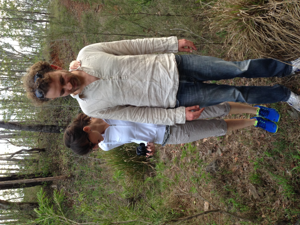

In [101]:
p = Image.open(f)
ex = {TAGS.get(k):v for k,v in t.getexif().items()}
pprint(ex)
t = p.copy()
t.thumbnail((300,300))
t

{'GPSInfo': 1036,
 'Rating': 0,
 'ResolutionUnit': 2,
 'RatingPercent': 0,
 'ExifOffset': 238,
 'Make': 'Apple',
 'Model': 'iPhone 5',
 'Software': 'Shotwell 0.15.1',
 'Orientation': 6,
 'DateTime': '2014:12:14 08:55:41',
 'YCbCrPositioning': 1,
 'XResolution': 72.0,
 'YResolution': 72.0}

In [88]:
szs = df.groupby('canonical_stem').size().rename('num_fpaths')
szs.value_counts()

3    469
2      2
4      1
Name: num_fpaths, dtype: int64

In [90]:
dfa = pd.merge(df, szs.reset_index(), on='canonical_stem')
dfa[dfa.num_fpaths!=3].set_index(['canonical_stem', 'fstem']).sort_index()

fpath  \
canonical_stem fstem                                                                                 
Muil 0718_085  Muil 0718_085                     2018/2018-07-21 - Wedding/Watermarked for Face...   
               Muil 0718_085-2                   2018/2018-07-21 - Wedding/Watermarked for Face...   
Muil 0718_338  Muil 0718_338                     2018/2018-07-21 - Wedding/Watermarked for Face...   
               Muil 0718_338-2                   2018/2018-07-21 - Wedding/Watermarked for Face...   
Muil 0718_355  Muil 0718_355                     2018/2018-07-21 - Wedding/Watermarked for Face...   
               Muil 0718_355 - High Res Files    2018/2018-07-21 - Wedding/Muil 0718_355 - High...   
               Muil 0718_355-2                   2018/2018-07-21 - Wedding/Watermarked for Face...   
               Muil 0718_355-2 - High Res Files  2018/2018-07-21 - Wedding/Muil 0718_355-2 - Hi...   

                                                                                fname  \
canonical_stem fstem                                                                    
Muil 0718_085  Muil 0718_085                                        Muil 0718_085.jpg   
               Muil 0718_085-2                                    Muil 0718_085-2.jpg   
Muil 0718_338  Muil 0718_338                                        Muil 0718_338.jpg   
               Muil 0718_338-2                                    Muil 0718_338-2.jpg   
Muil 0718_355  Muil 0718_355                                        Muil 0718_355.jpg   
               Muil 0718_355 - High Res Files      Muil 0718_355 - High Res Files.jpg   
               Muil 0718_355-2                                    Muil 0718_355-2.jpg   
               Muil 0718_355-2 - High Res Files  Muil 0718_355-2 - High Res Files.jpg   

                                                 num_fpaths  
canonical_stem fstem                                         
Muil 0718_085  Muil 0718_085                              2  
               Muil 0718_085-2                            2  
Muil 0718_338  Muil 0718_338                              2  
               Muil 0718_338-2                            2  
Muil 0718_355  Muil 0718_355                              4  
               Muil 0718_355 - High Res Files             4  
               Muil 0718_355-2                            4  
               Muil 0718_355-2 - High Res Files           4

Huh! So two files (`085` and `338`) do indeed not exist in high-res format. Very glad I checked this.